# Math216 Introduction to Differential Equations
Deniz Bilman, Department of Mathematics, University of Michigan

## Lecture 1
Welcome to Math216. This is the first lecture and we mainly covered:

+ Phase portraits (one-dimensional)
+ Equilibrium points and their classifications
+ Direction fields.

Consider an object placed in an environment at ambient temperature $T_0$. Let $u(t)$ be a differentiable function that denotes the temperature of the object at time $t\in\mathbb{R}$. Note that in this case, if $u(t)\leq T_0$ then $\frac{du}{dt}\geq 0$. _Newton's Law of Cooling_ states that the temperature of this object is governed by the following first order ordinary differential equation (ODE):
\begin{equation}
\frac{du}{dt}= -k(u-T_0),
\end{equation}
where $k>0$ is a proportionality constant. $T_0$ and $k$ are the _parameters_ of this ODE. $t$ is the _independent variable_ and $u$ is the _dependent variable_ ($u$ depends on $t$).

__Question:__ Are there any solutions $u=\varphi(t)$ of this ODE that are constant in time? Does there exist solutions $\varphi(t)$ for which $\varphi'(t)\equiv 0$?

A quick look at the ODE tells us that the answer is "yes", and $\varphi(t)\equiv T_0$ is the only constant solution. But there are other functions $u(t)$ that satisfy the ODE as well.

Now assume that $u(t)\neq T_0$. Using elementary calculus, we can integrate this ODE and obtain the __general solution__:
\begin{equation}\begin{aligned} \frac{u'}{u-T_0}&=-k\\ \log|u-T_0 | &= -kt + C\\ u &= T_0 + c e^{-k t},\end{aligned}
\end{equation}
where we have set $c=\pm e^{C}\in\mathbb{R}$. This defines a 1-parameter family of curves in the $(t,u)$-plane, parametrized by $c\in\mathbb{R}$.

Suppose that the parameters are fixed: $T_0=60$ and $k=1.5$. The arbitrary constant $c$ can be determined by setting an initial value for the temperature: $u(0)=70$, for example, gives $c=10$. Similarly, $u(0)=60$ corresponds to $c=0$.

In [1]:
using ODE;
using PlotlyJS;
# import Plots
# init_notebook(true)
# # using Plots
# # plotly()
const timespan = 0:0.1:8.0;
const k = 1.5;
const T0 = 60.0;
tracesODE1 = GenericTrace[];
function rhsODE1(t,y)
  return -k*(y-T0)
end;
const initialdata=50.0:2.5:70.0;
for j in 1:length(initialdata)
  u0 = initialdata[j]
  t,u = ode45(rhsODE1,u0,timespan)
  trace = scatter(x=t, y=u, name = "u(0)=$(initialdata[j])");
  push!(tracesODE1, trace);
end

plot(tracesODE1, Layout(title="Integral Curves", xaxis=attr(title="t"),yaxis=attr(title="u(t)")))

It is seen here that all of the solutions that start at different initial conditions tend to the equilibrium solution $y=\varphi(t)\equiv 60$ as $t\to\infty$. $y=60$ is an _asymptotically stable equilibrium solution_. (The plots are interactive. You can use the menu on top right of the plot to zoom in/out or navigate the plot etc.)

As seen in class, it is not in general true that the solutions that start close to an equilibrium solution approach the equilibrium solution as $t\to\infty$. Consider, for example, the following ODE:
$$\frac{dy}{dt} = \frac{1}{2}(y-20)$$
which has the equilibrium solution $y=\varphi(t)\equiv 20$. Below is a plot of the integral curves corresponding to initial conditions that are close to $y=20$. Note that all of the solutions that start close to the equilibrium solution __move away__ from the equilibrium solution as $t\to\infty$ in this case. $y=20$ is called an _unstable equilibrium solution_.

In [2]:
const timespan3 = 0:0.01:10;
tracesODE3=GenericTrace[];
function rhsODE3(t,y)
  return 0.5*(y-20.0)
end;
const initialdata3= 18.0:0.5:22.0;
for j in 1:length(initialdata3)
  y0 = initialdata3[j]
  t,y = ode45(rhsODE3,y0,timespan3)
  trace = scatter(x=t, y=y, name = "y(0)=$(initialdata3[j])");
  push!(tracesODE3, trace)
end
plot(tracesODE3, Layout(title="Integral Curves", xaxis=attr(title="t"),yaxis=attr(title="y(t)")))

We now take a look at the phase portrait for this ODE by plotting the right hand side $f(y):=\frac{1}{2}(y-20)$. It can be seen that $f(y)<0$ for $y<20$. This implies that if a solution $y(t)$ of the ODE attains a value smaller than $20$, then $y(t)$ decreases as $t$ increases. Similarly, $f(y)>0$ for $y>20$. This implies that if a solution $y(t)$ of the ODE attains a value greater than $20$, then $y(t)$ increases as $t$ increases. Consequently, solutions corresponding to initial conditions that are close to $y=20$ (no matter how close) move away as $t$ increases.

In [3]:
xspan = -1.5:0.01:1.5;
fspan = 0.5*(xspan-20.0);
tracesf=GenericTrace[];
trace = scatter(x=xspan, y=fspan, name = "f(y)");
push!(tracesf, trace);
plot(tracesf, Layout(title="Phase Portrait", xaxis=attr(title="y"),yaxis=attr(title="f(y)")))

The classification of equilibrium points of the ODE $y'=f(y)$ can be done according to the behavior of $f(y)$ near its zeros:

+ $f(y_1) = 0$ and $f'(y_1)<0$: $y_1$ is an asymptotically stable equilibrium point.
+ $f(y_1) = 0$ and $f'(y_1)>0$: $y_1$ is an unstable equilibrium point.
+ $f(y_1) = 0$ and $f'(y_1)=0$: $y_1$ is a semistable equilibrium point.

Finally, consider the ODE
$$\frac{dy}{dt} = y^2(y^2-1).$$
We cannot directly integrate this. But we can still determine the equilibrium solutions, which satisfy $f(y)=0$, where $f(y):=y^2(y^2-1)$. It follows that the equilibrium solutions are found to be $y_1 = -1$, $y_2=0$, $y_3=1$. They are classified as:

+ $y_1=-1$: asymptotically stable equilibrium point
+ $y_2=0 $: semistable equilibrium point
+ $y_3= 1$: unstable equilibrium point.

We can see this from the phase portrait.

In [4]:
xspan = -1.5:0.01:1.5;
fspan = xspan.*xspan.*(xspan.*xspan - 1.0);
tracesf=GenericTrace[];
trace = scatter(x=xspan, y=fspan, name = "f(y)");
push!(tracesf, trace);
plot(tracesf, Layout(title="Phase Portrait", xaxis=attr(title="y"),yaxis=attr(title="f(y)")))

Let's numerically integrate this ODE to obtain the following integral curves. Below you can see the stable/unstable nature of the equilibrium solutions.

In [5]:
const timespan2 = 0:0.01:12;
tracesODE2=GenericTrace[];
function rhsODE2(t,y)
  return y*y*(y-1.0)*(y+1.0)
end;
const initialdata2=-1.5:0.25:1.0;
for j in 1:length(initialdata2)
  y0 = initialdata2[j]
  t,y = ode45(rhsODE2,y0,timespan2)
  trace = scatter(x=t, y=y, name = "y(0)=$(initialdata2[j])");
  push!(tracesODE2, trace);
end
plot(tracesODE2, Layout(title="Integral Curves", xaxis=attr(title="t"),yaxis=attr(title="y(t)")))

### Direction Fields (also known as slope fields)
We can also plot the direction fields of the ODEs we studied. Direction field for an ODE is the vector field that consists of the vectors tangent to the integral curves associated with that ODE.

We begin with the ODE
$$\frac{du}{dt}= -1.5(u-60),$$
whose explicit solution we found in class. Below is a plot of the direction field (you can plot this more efficiently in MATLAB.)

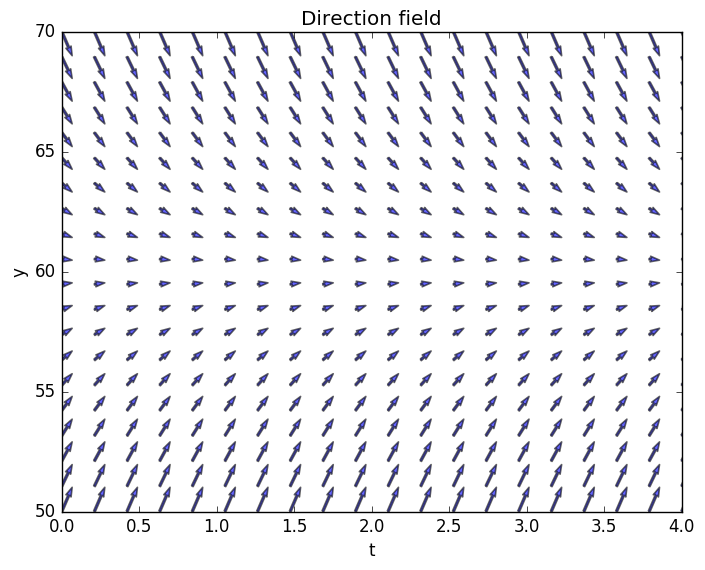

/Users/bilman/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
import PyPlot;
m = 20;
xs = linspace(0, 4.0, m);
ys = linspace(50.0,70.0,m);
us = vec([x for x in xs, y in ys])
vs = vec([y for x in xs, y in ys])
fxs = vec([1 for x in xs, y in ys])
fys = vec([-1.5*(y-60.0) for x in xs, y in ys])
PyPlot.quiver(us,vs,fxs,fys,color="Blue",alpha=0.6,antialiased=true,lw=1.2, angles="xy",scale_units="xy",hold=false);
PyPlot.title("Direction field");
PyPlot.xlabel("t");
PyPlot.ylabel("y");

You may think of a direction field as a giant pinball machine operated by the nature (the ODE). There are infinitely many ''kickers'' in the $(t,y)$-plane which keep the solution on the correct (satisfying the ODE) trajectory (integral curve).

Now consider again the more complicated (nonlinear) ODE
$$\frac{dy}{dt} = y^2(y^2-1).$$
See below for a plot of the direction field. You can also see the  nature of the equilibrium points from this vector field.

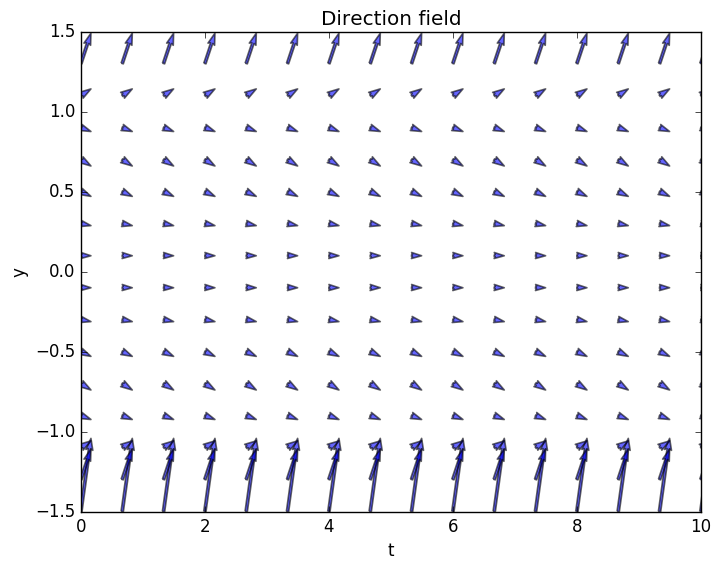

In [13]:
m = 16;
xs = linspace(0, 10.0, m);
ys = linspace(-1.5,1.5,m);
us = vec([x for x in xs, y in ys])
vs = vec([y for x in xs, y in ys])
fxs = vec([1 for x in xs, y in ys])
fys = vec([(y.^2).*(y.^2-1.0) for x in xs, y in ys])
PyPlot.quiver(us,vs,fxs,fys,color="Blue",alpha=0.6,antialiased=true,lw=1.2, angles="xy",scale_units="xy",hold=false);
PyPlot.title("Direction field");
PyPlot.xlabel("t");
PyPlot.ylabel("y");

### Acknowledgements

I would like to thank the following people for correcting a mistake in these notes:

+ Betty Wan